In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from fastseg import MobileV3Small
from fastseg.image.colorize import colorize, blend
from dataloader import UROBDataset
import torchvision.transforms as transforms
import torchvision
import cv2
from PIL import Image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(720, 1280, 3)
torch.Size([3, 512, 910])


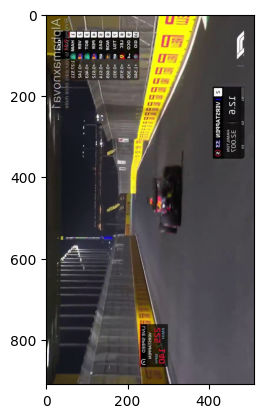

In [29]:
img = Image.open('./dataset/tests/small_test01/rgb/frame_801.jpg')
print(np.array(img).shape)


t = transforms.Compose([
    transforms.Resize(512, interpolation=Image.BICUBIC),
    transforms.ToTensor()
])

img_t = t(img)
print(img_t.shape)
plt.imshow(torch.transpose(img_t, 2, 0).numpy())

In [ ]:
device = 'cuda:0'
if not torch.cuda.is_available():
    device = 'cpu'

print(device)

cuda:0


In [ ]:

# construct the dataset
target_shape = [1500, 1024]
train_dataset = UROBDataset(filenames_file='./filenames.pkl', target_img_shape=target_shape)

# construct the dataloader
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.RandomAffine(20),
     transforms.RandomAutocontrast()
])
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=10,
                                          shuffle=True, num_workers=1)


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, type(images))
for i in range(images.shape[0]):
    print(images[i, :, :, :].shape)
    imshow(images[i, :, :, :])


(720, 732, 3) (512, 520)
(732, 720, 3) (520, 512)
(720, 732, 3) (512, 520)
(732, 720, 3) (520, 512)
(720, 732, 3) (512, 520)

ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/koondra/.local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/koondra/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/koondra/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/koondra/temp_school/UROB/hws/hw03/UROB_segmentation/dataloader.py", line 40, in __getitem__
    img = self.padd(img, labels).transpose((2,1,0))
  File "/home/koondra/temp_school/UROB/hws/hw03/UROB_segmentation/dataloader.py", line 67, in padd
    print(labels.reshape((h,w,1)).shape, [h,w,c])
ValueError: cannot reshape array of size 266240 into shape (732,720,1)



(732, 720, 3) (520, 512)
